# Description

### This file contains a class and three functions.

## Class:

### Tree:
- **Description**: This class represents our data structure, modeling the network that servers will follow. It defines the general rules and connections (network) that each server needs to follow.

## Functions:

### 1. create_tree:
- **Description**: Generates a network of servers as a random directed tree with a specified maximum depth (`threshold_depth`). The tree is represented as a dictionary of nodes, each containing a dictionary of its neighbors.
- **Input**:
  - `num_of_nodes` (int): The number of servers in the network.
  - `threshold_depth` (int): The maximum depth of the tree.
- **Output**:
  - `node_list` (dict): A dictionary containing the relationships between the servers (nodes).
  - `layers` (list): A list detailing the distribution of nodes across different layers.

### 2. generate_log:
- **Description**: Generates random processes based on the network. It creates `num_processes` random processes with a constraint on the maximum number of requests (`max_requests`).
- **Input**:
  - `node_list` (dict): A dictionary containing the relationships between the servers (nodes).
  - `num_processes` (int): The number of different processes to create according to the tree.
  - `max_requests` (int or None): The maximum number of requests each process can make. If `None`, there are no restrictions.
- **Output**:
  - `log_entries` (list): A list of generated processes according to the tree.

### 3. visualize_tree:
- **Description**: Visualizes the generated network.
- **Input**:
  - `node_list` (dict): A dictionary containing the relationships between the servers (nodes).
  - `layers` (list): A list detailing the distribution of nodes across different layers.
- **Output**:
  - None


In [11]:
import random
import datetime
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
class Tree:
    def __init__(self, processid=""):
        self.processid = processid
        self.t_to = {}
    def add_to(self,process):
        if id not in self.t_to:
            self.t_to[process.processid] = process 

In [14]:
def visualize_tree(node_list, layers):
    G = nx.DiGraph()
    
    # Add nodes to the graph
    for layer_index, layer_size in enumerate(layers):
        for i in range(layer_size):
            node = node_list[i + sum(layers[:layer_index])]
            G.add_node(node.processid)

    # Add edges between nodes
    for layer_index, layer_size in enumerate(layers):
        for i in range(layer_size):
            node = node_list[i + sum(layers[:layer_index])]
            for to_server in node.t_to:
                G.add_edge(node.processid, to_server)
    pos = {}
    y_increment = 1.0 / (len(layers) - 1) if len(layers) > 1 else 0
    x_space = 0.5  # Space between nodes
    for layer_index, layer_size in enumerate(layers):
        center_x = (layer_size - 1) / 2.0
        for i in range(layer_size):
            node = node_list[i + sum(layers[:layer_index])]
            pos[node.processid] = ((i - center_x) * x_space, 1 - layer_index * y_increment)  # Reverse y coordinate

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=12, font_weight="bold")
    plt.show()


Layers distribution: [1, 2, 1]


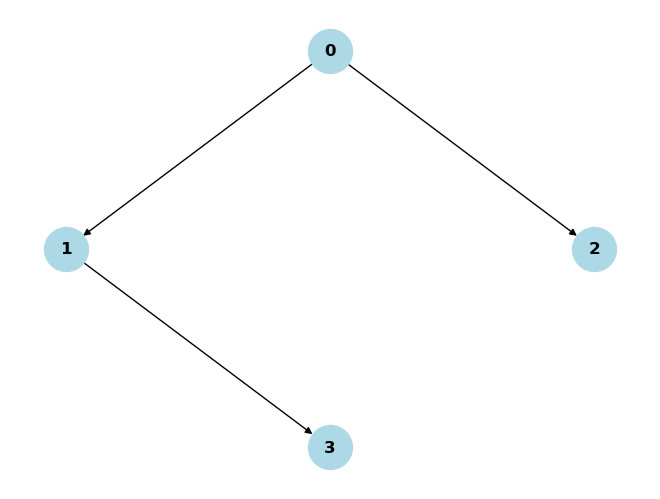

{0: <__main__.Tree at 0x28cc5e91710>,
 1: <__main__.Tree at 0x28cc5e55010>,
 2: <__main__.Tree at 0x28cc5e54cd0>,
 3: <__main__.Tree at 0x28cc5e55290>}

In [20]:
def create_tree(num_of_nodes, threshold_depth):
    # Initialize nodes
    node_list = {i: Tree(i) for i in range(num_of_nodes + 1)}

    # Layer distribution
    layers = [] 
    cur_num_of_nodes = num_of_nodes
    cur_depth = threshold_depth

    while cur_num_of_nodes > 0 and cur_depth > 0:
        cur_rand = random.randint(1, cur_num_of_nodes)
        layers.append(cur_rand)
        cur_num_of_nodes -= cur_rand
        cur_depth -= 1
    if cur_depth == 0 and cur_num_of_nodes > 0:
        layers[-1] += cur_num_of_nodes

    layers = [1] + layers  # Ensure the first layer always has the root node
    print("Layers distribution:", layers)

    # Connecting nodes
    start = 1
    for depth in range(1, len(layers)):
        end = start + layers[depth]
        for i in range(start, end):
            if depth == 1:
                # Connect to "null" node (node 0)
                node_list[0].add_to(node_list[i])
            else:
                # Connect to at least one node from the previous layer
                prev_start = start - layers[depth - 1]
                prev_end = start
                connected = False
                while not connected and prev_start < prev_end:
                    for j in range(prev_start, prev_end):
                        if random.uniform(0, 1) > 0.5:
                            node_list[j].add_to(node_list[i])
                            connected = True
                    if not connected:
                        # Ensure at least one connection
                        j = random.randint(prev_start, prev_end - 1)
                        node_list[j].add_to(node_list[i])
                        connected = True

            # Connect to nodes from any previous layer with a probability
            for prev_layer in range(1, depth):
                prev_start = sum(layers[1:prev_layer])
                prev_end = prev_start + layers[prev_layer]
                for j in range(prev_start, prev_end):
                    if random.uniform(0, 1) > 0.5:
                        node_list[j].add_to(node_list[i])

            # Connect to random nodes from random future layers (two or more layers ahead)
            for future_layer in range(depth + 2, len(layers)):
                future_start = sum(layers[1:future_layer])
                future_end = future_start + layers[future_layer]
                if future_start < future_end:
                    k = random.randint(future_start, future_end - 1)
                    node_list[i].add_to(node_list[k])

        start = end
    
    return node_list,layers

    # Print the structure of the tree
    print("Tree structure:")
    for x in node_list:
        print(f"Node {node_list[x].processid}:")
        print("  To:", [node_list[x].t_to[y].processid for y in node_list[x].t_to])
    return node_list
net_tree,layers = create_tree(3, 3)
visualize_tree(list(net_tree.values()), layers)
net_tree

Layers distribution: [1, 8, 1, 2, 4, 4, 1]


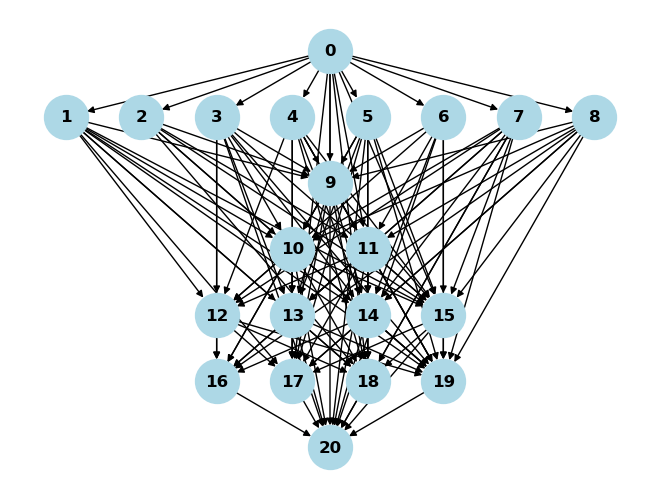

{'FromServer': 0, 'ToServer': 2, 'time': 0, 'action': 'Request', 'processId': 1}
{'FromServer': 2, 'ToServer': 0, 'time': 5, 'action': 'Response', 'processId': 1}
{'FromServer': 0, 'ToServer': 8, 'time': 7, 'action': 'Request', 'processId': 2}
{'FromServer': 8, 'ToServer': 0, 'time': 15, 'action': 'Response', 'processId': 2}
{'FromServer': 0, 'ToServer': 4, 'time': 9, 'action': 'Request', 'processId': 3}
{'FromServer': 4, 'ToServer': 9, 'time': 17, 'action': 'Request', 'processId': 3}
{'FromServer': 9, 'ToServer': 4, 'time': 20, 'action': 'Response', 'processId': 3}
{'FromServer': 4, 'ToServer': 0, 'time': 26, 'action': 'Response', 'processId': 3}
{'FromServer': 0, 'ToServer': 15, 'time': 18, 'action': 'Request', 'processId': 4}
{'FromServer': 15, 'ToServer': 17, 'time': 27, 'action': 'Request', 'processId': 4}
{'FromServer': 17, 'ToServer': 15, 'time': 37, 'action': 'Response', 'processId': 4}
{'FromServer': 15, 'ToServer': 20, 'time': 47, 'action': 'Request', 'processId': 4}
{'FromSe

In [15]:
def generate_log(node_list, num_processes, max_requests):
    log_entries = []

    def traverse_and_log(node, process_id, timestamp):
        req_counter = 0
        path = [node]
        visited = set()

        while (max_requests is None or max_requests == 0 or req_counter < max_requests) and path:
            current_node = path[-1]

            # Ensure each process has at least one request and one response
            if req_counter == 0 or ((max_requests is None or max_requests == 0 or req_counter < max_requests) and current_node.t_to and random.choice([True, False])):
                next_node = random.choice(list(current_node.t_to.values()))
                if next_node.processid not in visited:
                    from_server = current_node.processid
                    log_entries.append({
                        'FromServer': from_server,
                        'ToServer': next_node.processid,
                        'time': timestamp,
                        'action': 'Request',
                        'processId': process_id
                    })
                    timestamp += random.randint(1, 10)
                    req_counter += 1
                    path.append(next_node)
                    visited.add(next_node.processid)
            else:
                if len(path) > 1:
                    from_server = current_node.processid
                    to_server = path[-2].processid
                    log_entries.append({
                        'FromServer': from_server,
                        'ToServer': to_server,
                        'time': timestamp,
                        'action': 'Response',
                        'processId': process_id
                    })
                    timestamp += random.randint(1, 10)
                    path.pop()

                    if to_server == 0:
                        break
                else:
                    break

        while len(path) > 1:
            current_node = path.pop()
            from_server = current_node.processid
            to_server = path[-1].processid
            log_entries.append({
                'FromServer': from_server,
                'ToServer': to_server,
                'time': timestamp,
                'action': 'Response',
                'processId': process_id
            })
            timestamp += random.randint(1, 10)
            if to_server == 0:
                break

    timestamp = 0
    for process_counter in range(1, num_processes + 1):
        traverse_and_log(node_list[0], process_counter, timestamp)
        timestamp += random.randint(1, 10)

    return log_entries

# Example usage
node_list,layers = create_tree(20, 12)
log_entries = generate_log(node_list, 15, 0)
visualize_tree(list(node_list.values()), layers)
for entry in log_entries:
    print(entry)